In [78]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# Import CSS file and extract relevant columns
df = pd.read_csv('sector_classes_20230503_004612.csv')
df = df.drop('timestamp', axis=1)
df

,Instrument,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub-Industry Name
0,NEE.N,Utilities,Utilities,Electric Utilities,Electric Utilities
1,SHW.N,Materials,Materials,Chemicals,Specialty Chemicals
2,ECL.N,Materials,Materials,Chemicals,Specialty Chemicals
3,APD.N,Materials,Materials,Chemicals,Industrial Gases
4,FRC.N,Financials,Banks,Banks,Regional Banks
...,...,...,...,...,...
493,STX.OQ,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
494,INTU.OQ,Information Technology,Software & Services,Software,Application Software
495,QRVO.OQ,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment,Semiconductors
496,DLR.N,Real Estate,Equity Real Estate Investment Trusts (REITs),Specialized REITs,Data Center REITs


In [79]:
df.dtypes

Instrument                  object
GICS Sector Name            object
GICS Industry Group Name    object
GICS Industry Name          object
GICS Sub-Industry Name      object
dtype: object

converting strings of sector and industry names to dummy variables

In [80]:
data = df
subset = data.iloc[:, 1:5]
#data.apply(lambda x: pd.factorize(x)[0])
subset = subset.apply(lambda x: pd.factorize(x)[0])
stock_names = data.iloc[:, 0:1]
data = pd.merge(stock_names, subset, left_index=True, right_index=True)
data

,Instrument,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub-Industry Name
0,NEE.N,0,0,0,0
1,SHW.N,1,1,1,1
2,ECL.N,1,1,1,1
3,APD.N,1,1,1,2
4,FRC.N,2,2,2,3
...,...,...,...,...,...
493,STX.OQ,4,19,41,65
494,INTU.OQ,4,4,10,11
495,QRVO.OQ,4,6,6,7
496,DLR.N,3,3,39,108


In [81]:
data.dtypes

Instrument                  object
GICS Sector Name             int64
GICS Industry Group Name     int64
GICS Industry Name           int64
GICS Sub-Industry Name       int64
dtype: object

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [12.5, 12.5, 51.875, 51.875],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [103.75, 103.75, 142.5, 142.5],
  [32.1875, 32.1875, 123.125, 123.125],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [180.0, 180.0, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [242.5, 242.5, 281.875, 281.875],
  [196.25, 196.25, 262.1875, 262.1875],
  [77.65625, 77.65625, 229.21875, 22

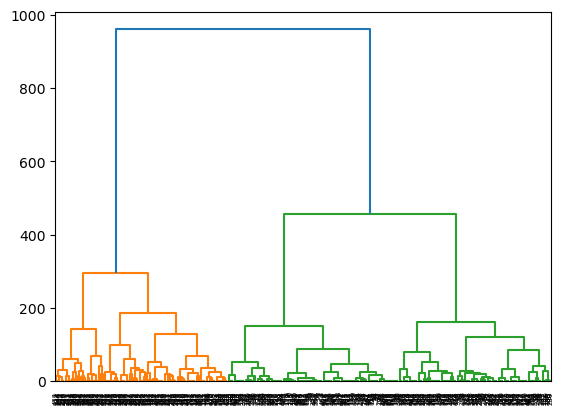

In [82]:
cols = ['GICS Sector Name', 'GICS Industry Group Name', 'GICS Industry Name', 'GICS Sub-Industry Name']
cluster_data = data[cols]
# Create distance matrix using Euclidean distance
dist_matrix = pdist(cluster_data, metric='euclidean')

# Perform hierarchical clustering using Ward linkage
linkage_matrix = linkage(dist_matrix, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix, labels=data.index)

In [83]:
data

,Instrument,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub-Industry Name
0,NEE.N,0,0,0,0
1,SHW.N,1,1,1,1
2,ECL.N,1,1,1,1
3,APD.N,1,1,1,2
4,FRC.N,2,2,2,3
...,...,...,...,...,...
493,STX.OQ,4,19,41,65
494,INTU.OQ,4,4,10,11
495,QRVO.OQ,4,6,6,7
496,DLR.N,3,3,39,108


In [84]:
def concat_cluster_code(row):
    return str(row[-4]) + str(row[-3]) + str(row[-2]) + str(row[-1])
data['Cluster Code'] = data.apply(concat_cluster_code, axis=1)
data

,Instrument,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub-Industry Name,Cluster Code,Cluster Code Sum
0,NEE.N,0,0,0,0,0000,0
1,SHW.N,1,1,1,1,1111,1114
2,ECL.N,1,1,1,1,1111,1114
3,APD.N,1,1,1,2,1112,1116
4,FRC.N,2,2,2,3,2223,2230
...,...,...,...,...,...,...,...
493,STX.OQ,4,19,41,65,4194165,4194290
494,INTU.OQ,4,4,10,11,441011,441036
495,QRVO.OQ,4,6,6,7,4667,4686
496,DLR.N,3,3,39,108,3339108,3339258


In [85]:
cluster_codes = data["Cluster Code"]
code_counts = cluster_codes.value_counts()
print(code_counts)

0000        16
68910       16
4667        15
6131618     12
7121442     12
            ..
9165188      1
112893       1
2182495      1
91621100     1
41925125     1
Name: Cluster Code, Length: 126, dtype: int64
